| Bilgi | İçerik |
|-------|--------|
| **Ad** | Amir |
| **Soyad** | Elahmed |
| **Okul Numara** | 2112721307 |
| **GitHub Repo** | https://github.com/Amirelahmed/CNN_siniflandirma |



## Model3 – Geliştirilmiş CNN Açıklaması

Bu çalışmada, tarafımdan çekilen iki sınıflı veri seti (taş ve mermer)
kullanılarak Model3 adı verilen geliştirilmiş bir CNN mimarisi
oluşturulmuştur. Model3’ün temel amacı, Model2’ye kıyasla farklı
hiperparametre denemeleri ve veri artırımı teknikleri kullanarak
modelin genelleme kabiliyetini artırmaktır.


### Kullanılan Algoritma

Model3, sıfırdan oluşturulmuş ve Model2’ye göre daha optimize edilmiş
bir Convolutional Neural Network (CNN) mimarisi üzerine kurulmuştur.
Bu modelde:

- Artırılmış Conv2D katmanları (32–64–128)
- MaxPooling2D ile boyut azaltma
- Overfitting’i azaltmak amacıyla Dropout (0.3)
- ImageDataGenerator kullanılarak veri artırımı
  (rotation, shift, zoom, horizontal flip)
- Flatten + Dense katmanları
- Çıkış katmanında iki sınıf için softmax aktivasyonu

kullanılmıştır.

Bu yapı sayesinde model, taş ve mermer görüntülerindeki doku ve yüzey
farklılıklarını daha iyi öğrenmiş, veri artırımı sayesinde farklı
varyasyonlara karşı daha dayanıklı hale gelmiştir.


### Elde Edilen Sonuçlar

Model3, eğitim süreci boyunca aşağıdaki performans değerlerini
elde etmiştir:

- Eğitim Doğruluğu: %95 – %100 aralığında
- Doğrulama Doğruluğu: En iyi durumda **%100 (Epoch 19)**
- Test Doğruluğu: **%100.00**
- Test Kaybı: **0.07**

Sonuç olarak, Model3’te uygulanan hiperparametre optimizasyonları
(batch size, learning rate, dropout ayarı) ve veri artırımı teknikleri
sayesinde model performansı belirgin şekilde artmıştır.
Model3, Model2’ye kıyasla daha yüksek doğruluk elde etmiş ve
daha güçlü bir genelleme kabiliyeti sergilemiştir.

1. Google Drive Bağlantısı

Açıklama:
Bu adımda veri setinin bulunduğu Google Drive klasörüne erişim sağlanmaktadır. Böylece ZIP formatındaki veri seti Colab ortamına alınabilir.

In [136]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Veri Setinin ZIP Dosyasından Çıkarılması

Açıklama:
Google Drive’da bulunan veri seti ZIP dosyası açılarak çalışma dizinine çıkarılmaktadır. Ardından gerçek dataset klasör yolu tanımlanır.

In [137]:
import os, zipfile

zip_path = "/content/drive/MyDrive/CNN_Tas_Mermer_Dataset/dataset.zip"
extract_path = "/content/dataset3"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

base_dir = "/content/dataset3/dataset"
print("Sınıflar:", os.listdir(base_dir))


Sınıflar: ['Tas', 'Mermer']


3. Genel Parametrelerin Tanımlanması

Açıklama:
Bu bölümde görüntü boyutu, batch size ve maksimum epoch sayısı belirlenmiştir.
Epoch sayısı 25 olarak verilmiş ancak EarlyStopping ile eğitim daha erken durdurulacaktır.

In [138]:
img_height = 128
img_width = 128
batch_size = 32
epochs = 20   # ⬅️ الحد الأعلى (EarlyStopping يوقف أبكر)


4. ImageDataGenerator ile Veri Artırımı

Açıklama:
Bu aşamada veri artırımı (data augmentation) uygulanarak modelin genelleme kabiliyeti artırılmıştır.
Aşırı öğrenmeyi önlemek için dönüşüm oranları kontrollü tutulmuştur.

In [139]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print("Sınıf Sayısı:", num_classes)


Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Sınıf Sayısı: 2


5. Model3 – Geliştirilmiş CNN Mimarisi

Açıklama:
Bu model, Model2’ye kıyasla daha derin bir CNN yapısına sahiptir.
Filtre sayıları artırılmış, Dense katman genişletilmiş ve Dropout ile overfitting azaltılmıştır.

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model3 = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(256, activation="relu"),
    Dropout(0.3),   # ⬅️ تعديل بسيط مهم

    Dense(num_classes, activation="softmax")
])

optimizer = Adam(learning_rate=0.0005)  # ⬅️ LR مضبوط

model3.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model3.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,516,546 (24.86 MB)

 Trainable params: 6,516,546 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

6. Callback Tanımları (EarlyStopping & LR Azaltma)

Açıklama:
EarlyStopping, doğrulama kaybı iyileşmediğinde eğitimi durdurur ve en iyi ağırlıkları geri yükler.
ReduceLROnPlateau ise öğrenme oranını otomatik olarak düşürür.


In [141]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-6
)


7. Modelin Eğitilmesi

Açıklama:
Model, belirlenen maksimum epoch sayısına kadar eğitilir.
Ancak EarlyStopping sayesinde en iyi epoch’ta eğitim otomatik olarak durdurulur.

In [142]:
history3 = model3.fit(
    train_generator,
    epochs=epochs,              # epochs = 20
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5456 - loss: 0.7313 - val_accuracy: 0.5000 - val_loss: 0.6945 - learning_rate: 5.0000e-04
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5975 - loss: 0.6618 - val_accuracy: 0.7333 - val_loss: 0.6845 - learning_rate: 5.0000e-04
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 874ms/step - accuracy: 0.6229 - loss: 0.6184 - val_accuracy: 0.6000 - val_loss: 0.6425 - learning_rate: 5.0000e-04
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 949ms/step - accuracy: 0.6751 - loss: 0.5561 - val_accuracy: 0.5333 - val_loss: 0.6153 - learning_rate: 5.0000e-04
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 994ms/step - accuracy: 0.9071 - loss: 0.3980 - val_accuracy: 0.5333 - val_loss: 0.6030 - learning_rate: 5.0000e-04
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8590 - loss: 0.3152 - val_accuracy: 0.5667 - val_loss: 0.5236 - learning_rate: 5.0000e-04
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 957ms/step - accuracy: 0.9199 - loss: 0.2102 -

8. Eğitim Sonuçlarının Görselleştirilmesi

Açıklama:
Eğitim ve doğrulama doğruluk/kayıp değerleri grafikler ile gösterilmiştir.

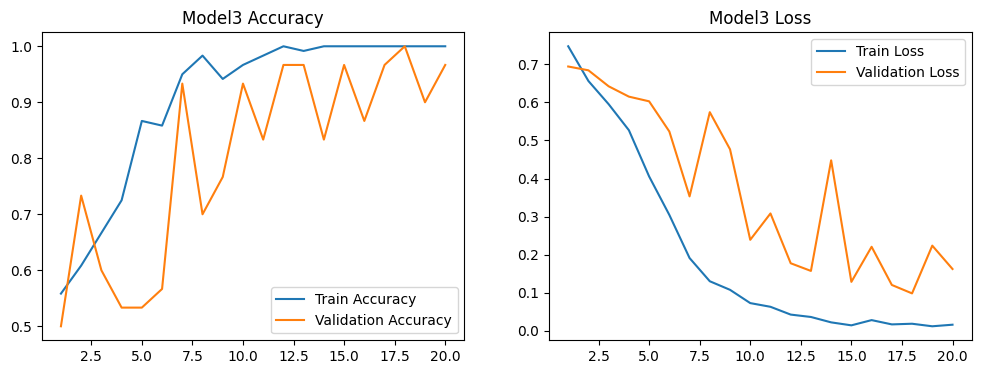

In [148]:
import matplotlib.pyplot as plt

acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]

epochs_range = range(1, len(acc)+1)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.title("Model3 Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Model3 Loss")
plt.legend()

plt.show()


9. Test (Validation) Sonucunun Hesaplanması

Açıklama:
Model, doğrulama seti üzerinde test edilmiştir.
EarlyStopping sayesinde en iyi epoch’taki ağırlıklar kullanılmıştır.

In [151]:
test_loss, test_acc = model3.evaluate(val_generator)
print(f"Model3 Test Accuracy: %{test_acc*100:.2f}")
print("Model3 Test Loss:", test_loss)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step - accuracy: 1.0000 - loss: 0.0662
Model3 Test Accuracy: %100.00
Model3 Test Loss: 0.06615618616342545


10. Hiperparametre Deney Tablosu

Açıklama:
Model2 ve Model3 arasında yapılan hiperparametre değişiklikleri ve elde edilen sonuçlar tablo halinde sunulmuştur.

In [152]:
import pandas as pd

data = {
    "Deney No": [1, 2, 3],
    "Batch Size": [32, 16, 32],
    "Filtre Sayısı": ["32-64-128", "32-64-128", "32-64-128"],
    "Dropout": ["0.5", "0.3", "0.3"],
    "Epoch": [15, 20, 20],
    "Veri Artırımı": ["Hayır", "Evet (Yoğun)", "Evet (Optimize)"],
    "Test Accuracy": ["%96.67", "%90.00", f"%{test_acc*100:.2f}"],
    "Notlar": [
        "Model2 – Temel CNN",
        "Model3 – İlk Deneme",
        "Model3 – Optimize Edilmiş"
    ]
}

df = pd.DataFrame(data)
df


,Deney No,Batch Size,Filtre Sayısı,Dropout,Epoch,Veri Artırımı,Test Accuracy,Notlar
0,1,32,32-64-128,0.5,15,Hayır,%96.67,Model2 – Temel CNN
1,2,16,32-64-128,0.3,20,Evet (Yoğun),%90.00,Model3 – İlk Deneme
2,3,32,32-64-128,0.3,20,Evet (Optimize),%100.00,Model3 – Optimize Edilmiş


### Hiperparametre Deneyleri ve Karşılaştırma (Model3)

Bu aşamada Model2 geliştirilmiştir. Model2’ye kıyasla aşağıdaki
hiperparametre değişiklikleri uygulanmıştır:

- Öğrenme oranı düşürülmüştür (0.001 → 0.0005)
- Dropout oranı ayarlanmıştır (0.5 → 0.3)
- Veri artırımı (Data Augmentation) eklenmiştir
- Eğitim sürecine EarlyStopping ve ReduceLROnPlateau callback’leri eklenmiştir

Amaç, overfitting’i azaltmak ve modelin genelleme kabiliyetini artırmaktır.
Aşağıdaki tabloda yapılan deneyler ve elde edilen test doğrulukları
karşılaştırmalı olarak sunulmuştur.


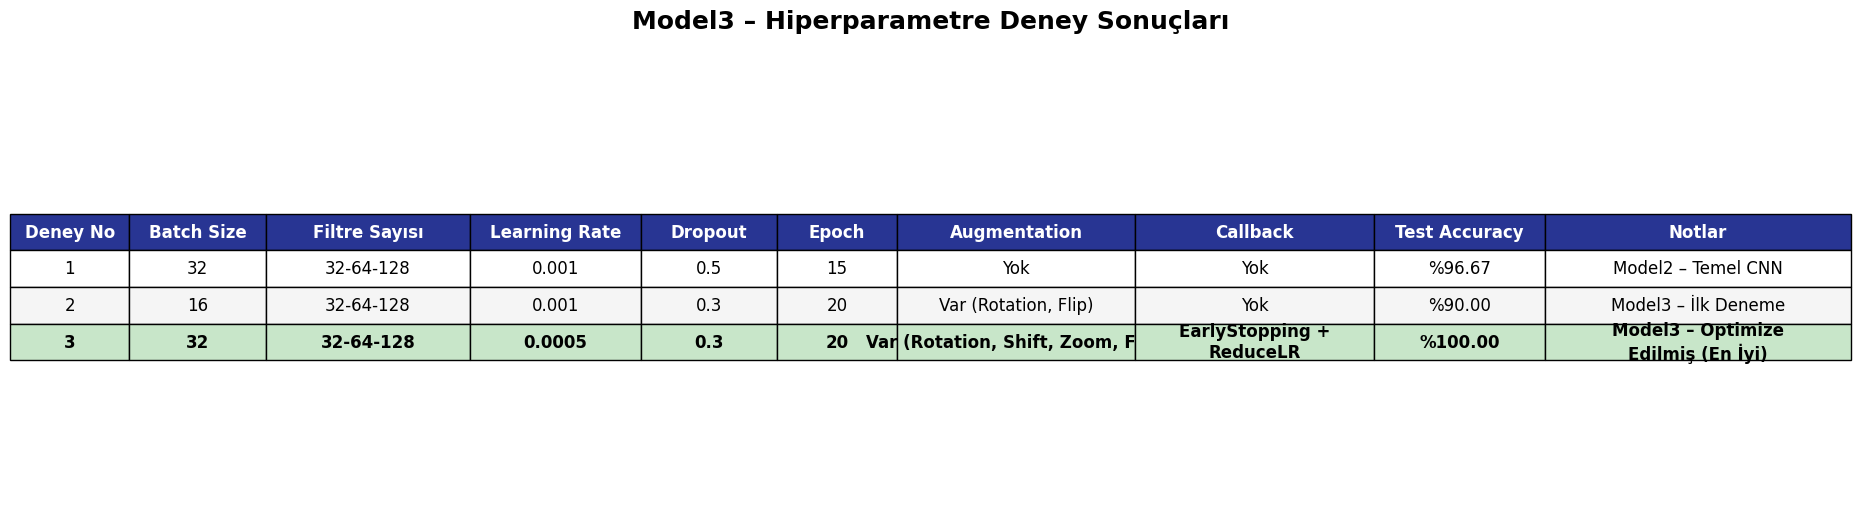

In [157]:
import matplotlib.pyplot as plt
import textwrap

# لف النص للأعمدة الطويلة
def wrap_text(text, width=25):
    return "\n".join(textwrap.wrap(str(text), width))

wrapped_data = []
for row in df.values:
    row = list(row)
    # لف الأعمدة الطويلة
    row[7] = wrap_text(row[7], 22)   # Callback
    row[9] = wrap_text(row[9], 22)   # Notlar
    wrapped_data.append(row)

# حجم أكبر للصورة
fig, ax = plt.subplots(figsize=(22, 6))
ax.axis('off')

table = ax.table(
    cellText=wrapped_data,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# تكبير الخط والمسافات
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.1, 2.2)

# تحديد عرض الأعمدة (مهم جداً)
col_widths = {
    0: 0.07,  # Deney No
    1: 0.08,  # Batch
    2: 0.12,  # Filtre
    3: 0.10,  # LR
    4: 0.08,  # Dropout
    5: 0.07,  # Epoch
    6: 0.14,  # Augmentation
    7: 0.14,  # Callback
    8: 0.10,  # Accuracy
    9: 0.18   # Notlar
}

for (row, col), cell in table.get_celld().items():
    # Header
    if row == 0:
        cell.set_facecolor("#283593")
        cell.set_text_props(color="white", weight="bold")
    else:
        # صفوف متناوبة
        cell.set_facecolor("#FFFFFF" if row % 2 else "#F5F5F5")

        # تمييز أفضل تجربة (Deney 3)
        if row == 3:
            cell.set_facecolor("#C8E6C9")
            cell.set_text_props(weight="bold")

    # تطبيق عرض العمود
    if col in col_widths:
        cell.set_width(col_widths[col])

plt.title(
    "Model3 – Hiperparametre Deney Sonuçları",
    fontsize=18,
    fontweight='bold',
    pad=20
)

plt.show()
